<a href="https://colab.research.google.com/github/jcasemiro/projeto_final/blob/main/Projeto_Final_%5BML_Falha_2%5D_Joao_Casemiro_de_Oliveira_Neto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
url = 'https://raw.githubusercontent.com/jcasemiro/projeto_final/refs/heads/main/bootcamp_train_clean.csv'
def_ML = pd.read_csv(url)

In [ ]:
def_ML.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,comprimento_do_transportador,tipo_do_aço_A300,...,indice_de_orientaçao,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154.0,169.0,260.124,260.136,75.000000,27.0,17.0,1364.000000,False,...,-0.2000,0.3068,125.0,False,False,False,False,False,False,False
1,1,1121.0,186.0,1789.332,1789.337,206.000000,9.0,194.0,1460.635202,False,...,-0.2857,0.1441,115.0,False,False,False,True,False,False,False
2,2,41.0,216.0,2708.878,2708.939,198.383916,275.0,134.0,1358.000000,False,...,-0.6514,1.0000,42.0,False,False,True,False,False,False,False
3,3,129.0,157.0,86.408,86.427,276.000000,39.0,26.0,1362.000000,False,...,-0.3214,0.8223,115.0,False,False,True,False,False,False,False
4,4,436.0,442.0,4959.398,530.985,63.000000,17.0,17.0,1356.000000,True,...,0.6471,0.2083,90.0,False,True,False,False,False,False,False


In [ ]:
def_ML.shape

(3390, 28)

In [ ]:
def_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   float64
 2   x_maximo                      3390 non-null   float64
 3   y_minimo                      3390 non-null   float64
 4   y_maximo                      3390 non-null   float64
 5   area_pixels                   3390 non-null   float64
 6   perimetro_x                   3390 non-null   float64
 7   perimetro_y                   3390 non-null   float64
 8   comprimento_do_transportador  3390 non-null   float64
 9   tipo_do_aço_A300              3390 non-null   bool   
 10  espessura_da_chapa_de_aço     3390 non-null   float64
 11  temperatura                   3390 non-null   float64
 12  index_de_bordas               3390 non-null   float64
 13  ind

In [ ]:
def_ML.nunique()

,0
id,3390
x_minimo,954
x_maximo,945
y_minimo,1739
y_maximo,1731
area_pixels,476
perimetro_x,264
perimetro_y,197
comprimento_do_transportador,83
tipo_do_aço_A300,2


# KNN

In [ ]:
X = def_ML.drop(columns=['falha_2']).copy()
y = def_ML['falha_2'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
le = LabelEncoder()

In [ ]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
numerical = X_train.select_dtypes(include='number').columns.tolist()

In [ ]:
categorical = X_train.select_dtypes(include='object').columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ]
)

In [ ]:
knn = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [ ]:
%%time
knn.fit(X_train, y_train)

CPU times: user 8.6 ms, sys: 991 µs, total: 9.59 ms
Wall time: 9.23 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['id', 'x_minimo', 'x_maximo',
                                                   'y_minimo', 'y_maximo',
                                                   'area_pixels', 'perimetro_x',
                                                   'perimetro_y',
                                                   'comprimento_do_transportador',
                                                   'espessura_da_chapa_de_aço',
                                                   'temperatura',
                                                   'index_de_bordas',
                                                   'index_vazio',
                                                   'index_quadrado',
                                                   'log_das_areas',
                                                   'log_indice_x',
                                                   'log_indice_y',
                                                   'indice_de_orientaçao',
                                                   'sigmoide_das_areas',
                                                   'minimo_da_luminosidade']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
target_names_str = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names_str))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97       625
        True       0.64      0.43      0.52        53

    accuracy                           0.94       678
   macro avg       0.80      0.71      0.74       678
weighted avg       0.93      0.94      0.93       678



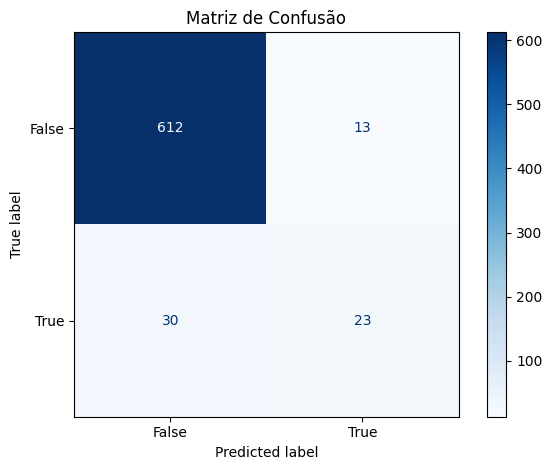

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()

In [ ]:
unique_values, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique_values, counts)))

#y_test.value_counts()

{np.int64(0): np.int64(625), np.int64(1): np.int64(53)}


In [ ]:
pd.DataFrame(y_pred, columns=['falha_2']).value_counts()

,count
falha_2,
0,642
1,36


In [ ]:
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(f"\nAcurácias da Validação Cruzada: {cv_scores}")
print(f"Acurácia Média CV: {np.mean(cv_scores):.4f}")
print(f"Desvio Padrão CV: {np.std(cv_scores):.4f}")


Acurácias da Validação Cruzada: [0.90855457 0.94100295 0.94690265 0.92625369 0.91445428 0.92035398
 0.91445428 0.92035398 0.91740413 0.91445428]
Acurácia Média CV: 0.9224
Desvio Padrão CV: 0.0117


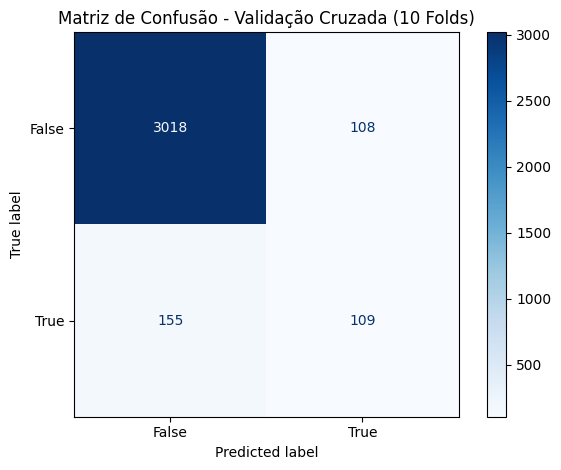

In [ ]:
y_encoded = le.fit_transform(y)
y_pred = cross_val_predict(knn, X, y_encoded, cv=10)

cm = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Validação Cruzada (10 Folds)")
plt.tight_layout()
plt.show()

# Árvore de Decisão

In [ ]:
X = def_ML.drop(columns=['falha_2']).copy()
y = def_ML['falha_2'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
le = LabelEncoder()

In [ ]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
numerical = X_train.select_dtypes(include='number').columns.tolist()

In [ ]:
categorical = X_train.select_dtypes(include='object').columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ]
)

In [ ]:
dt = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))
])

In [ ]:
dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['id', 'x_minimo', 'x_maximo',
                                                   'y_minimo', 'y_maximo',
                                                   'area_pixels', 'perimetro_x',
                                                   'perimetro_y',
                                                   'comprimento_do_transportador',
                                                   'espessura_da_chapa_de_aço',
                                                   'temperatura',
                                                   'index_de_bordas',
                                                   'index_vazio',
                                                   'index_quadrado',
                                                   'log_das_areas',
                                                   'log_indice_x',
                                                   'log_indice_y',
                                                   'indice_de_orientaçao',
                                                   'sigmoide_das_areas',
                                                   'minimo_da_luminosidade']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
target_names_str = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names_str))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       625
        True       0.54      0.58      0.56        53

    accuracy                           0.93       678
   macro avg       0.75      0.77      0.76       678
weighted avg       0.93      0.93      0.93       678



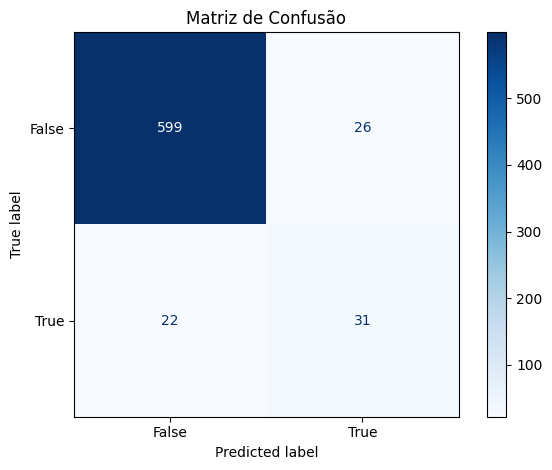

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()

In [ ]:
cv_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

print(f"\nAcurácias da Validação Cruzada: {cv_scores}")
print(f"Acurácia Média CV: {np.mean(cv_scores):.4f}")
print(f"Desvio Padrão CV: {np.std(cv_scores):.4f}")


Acurácias da Validação Cruzada: [0.1740413  0.92920354 0.94100295 0.9380531  0.93215339 0.93510324
 0.93510324 0.93510324 0.90855457 0.91150442]
Acurácia Média CV: 0.8540
Desvio Padrão CV: 0.2269


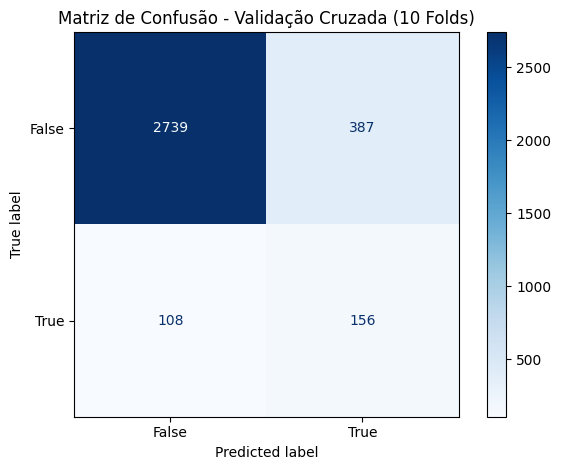

In [ ]:
y_encoded = le.fit_transform(y)
y_pred = cross_val_predict(dt, X, y_encoded, cv=10)

cm = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Validação Cruzada (10 Folds)")
plt.tight_layout()
plt.show()

# SVM

In [ ]:
X = def_ML.drop(columns=['falha_2']).copy()
y = def_ML['falha_2'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
    ]
)

In [ ]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
numerical = X_train.select_dtypes(include='number').columns.tolist()

In [ ]:
categorical = X_train.select_dtypes(include='object').columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ]
)

In [ ]:
svc = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', SVC())
])

In [ ]:
svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'x_minimo', 'x_maximo',
                                                   'y_minimo', 'y_maximo',
                                                   'area_pixels', 'perimetro_x',
                                                   'perimetro_y',
                                                   'comprimento_do_transportador',
                                                   'espessura_da_chapa_de_aço',
                                                   'temperatura',
                                                   'index_de_bordas',
                                                   'index_vazio',
                                                   'index_quadrado',
                                                   'log_das_areas',
                                                   'log_indice_x',
                                                   'log_indice_y',
                                                   'indice_de_orientaçao',
                                                   'sigmoide_das_areas',
                                                   'minimo_da_luminosidade']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('classifier', SVC())])

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
target_names_str = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names_str))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       625
        True       0.83      0.09      0.17        53

    accuracy                           0.93       678
   macro avg       0.88      0.55      0.57       678
weighted avg       0.92      0.93      0.90       678



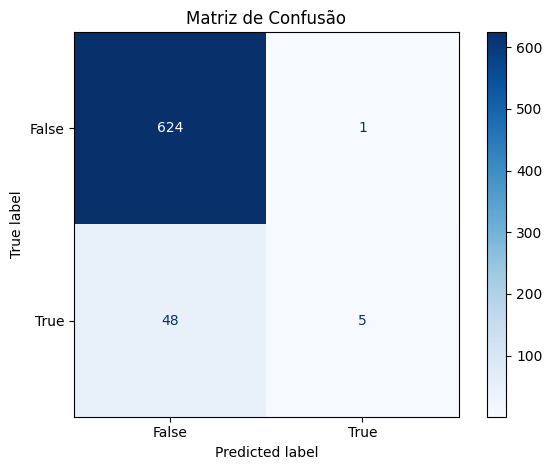

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()

In [ ]:
cv_scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

print(f"\nAcurácias da Validação Cruzada: {cv_scores}")
print(f"Acurácia Média CV: {np.mean(cv_scores):.4f}")
print(f"Desvio Padrão CV: {np.std(cv_scores):.4f}")


Acurácias da Validação Cruzada: [0.94690265 0.93215339 0.9380531  0.92625369 0.94100295 0.92625369
 0.92625369 0.92035398 0.92330383 0.92035398]
Acurácia Média CV: 0.9301
Desvio Padrão CV: 0.0087


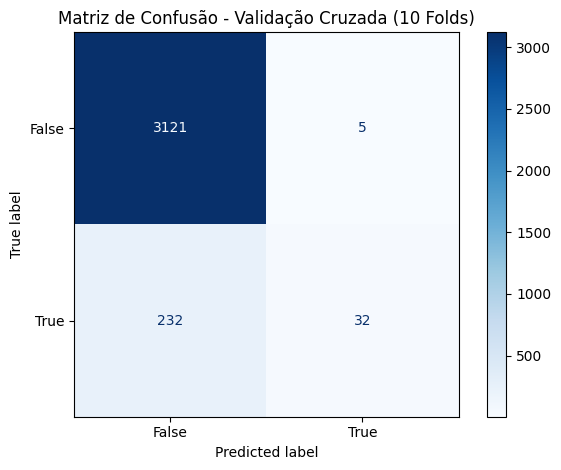

In [ ]:
y_encoded = le.fit_transform(y)
y_pred = cross_val_predict(svc, X, y_encoded, cv=10)

cm = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Validação Cruzada (10 Folds)")
plt.tight_layout()
plt.show()